# **Phase 4 Part C - Outlier Detection**
Émilie Brazeau, Nicholas Gin, Gordon Tang

In [ ]:
import pandas as pd 
import numpy as np  
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

## Performing the Outlier Detection

Load the data mart.

In [ ]:
url='https://drive.google.com/file/d/1mqxv8AFExcVBryjJqk-m8aX_5mXzOi7O/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, encoding='UTF-8')

df

,review_text,rating,branch_Disneyland California,branch_Disneyland Hong Kong,branch_Disneyland Paris,branch_Universal Studios Florida,branch_Universal Studios Japan,branch_Universal Studios Singapore,month,quarter,...,attendance_millions_2012,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021
0,daughter spent sunny hot day disneyland hong k...,4,0,1,0,0,0,0,7,3,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
1,location infront mtr station time required cov...,5,0,1,0,0,0,0,11,4,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
2,spent day disneyland great time family friendl...,5,0,1,0,0,0,0,4,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
3,recent tour hong kong limited time choose diff...,5,0,1,0,0,0,0,5,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
4,hong kong young kid place go fun obviously pie...,5,0,1,0,0,0,0,4,2,...,-0.442627,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90350,visit universal orlando brilliant experience p...,5,0,0,0,1,0,0,8,3,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710
90351,universal studio shall begin staff lovely ride...,5,0,0,0,0,0,1,9,3,...,-1.185813,-1.279161,-1.369828,-1.351164,-1.306594,-1.345734,-1.377830,-1.328516,-1.625254,-1.478053
90352,split day two park 10 hour great fun staff ama...,5,0,0,0,1,0,0,10,4,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710
90353,definitely great ride experience jurassic park...,4,0,0,0,1,0,0,7,3,...,-0.559182,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710


Look at the distribution of the review ratings. We see that the distribution is highly skewed towards 5 star reviews, and there is an extremely low amount of 1 and 2 star reviews.

Count of 1 rating reviews: 3240
Count of 2 rating reviews: 3845
Count of 3 rating reviews: 9948
Count of 4 rating reviews: 23458
Count of 5 rating reviews: 49864
Percentage of 1 rating reviews: 3.59%
Percentage of 2 rating reviews: 4.26%
Percentage of 3 rating reviews: 11.01%
Percentage of 4 rating reviews: 25.96%
Percentage of 5 rating reviews: 55.19%


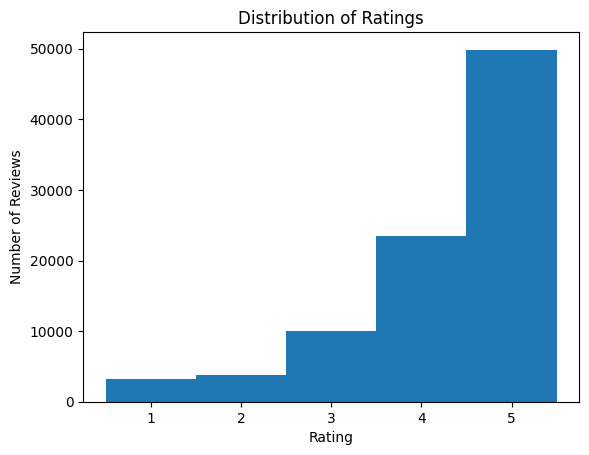

In [ ]:
# Create a histogram of the 'rating' column
plt.hist(df['rating'], bins=[1, 2, 3, 4, 5, 6], align='left')

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

# Get the count of each rating value
counts = df['rating'].value_counts()

# Print the counts
print("Count of 1 rating reviews:", counts[1])
print("Count of 2 rating reviews:", counts[2])
print("Count of 3 rating reviews:", counts[3])
print("Count of 4 rating reviews:", counts[4])
print("Count of 5 rating reviews:", counts[5])

percentages = counts / 90355 * 100

# Print the percentages
print("Percentage of 1 rating reviews: {:.2f}%".format(percentages[1]))
print("Percentage of 2 rating reviews: {:.2f}%".format(percentages[2]))
print("Percentage of 3 rating reviews: {:.2f}%".format(percentages[3]))
print("Percentage of 4 rating reviews: {:.2f}%".format(percentages[4]))
print("Percentage of 5 rating reviews: {:.2f}%".format(percentages[5]))

In [ ]:
# Defining our features and our target (what we are predicting).
X = df[['rating', 'branch_Disneyland California', 'branch_Disneyland Hong Kong', 'branch_Disneyland Paris', 'branch_Universal Studios Florida', 'branch_Universal Studios Japan', 'branch_Universal Studios Singapore', 'month', 'quarter', 'year', 'attendance_millions_2010', 'attendance_millions_2011', 'attendance_millions_2012', 'attendance_millions_2013', 'attendance_millions_2014', 'attendance_millions_2015', 'attendance_millions_2016', 'attendance_millions_2017', 'attendance_millions_2018', 'attendance_millions_2019', 'attendance_millions_2020', 'attendance_millions_2021']].values

We chose a pretty large value of 800 for n_neighbors, so that the algorithm was more strict in identifying outliers (it would require a larger number of nearby data points to form a cluster before considering a data point as an outlier).

We set the contamination value to 0.0785. The contamination controls the expected proportion of outliers in the data; if we only consider 1 and 2 star rating reviews as outliers, then we can expect 3.59% + 4.26% (7.85%) of our data to be outliers. This is how we determined our contamination value of 0.0785.

In [ ]:
lof = LocalOutlierFactor(n_neighbors=800, contamination=0.0785)
outlier_labels = lof.fit_predict(X)

In [ ]:
n_outliers = np.count_nonzero(outlier_labels == -1)
n_inliers = np.count_nonzero(outlier_labels == 1)

print(f"Number of outliers: {n_outliers}")
print(f"Number of inliers: {n_inliers}")

Number of outliers: 7091
Number of inliers: 83264


Retrieve which reviews in our dataset have been identified as outliers.

In [ ]:
# Create a new DataFrame with the same indices as df and the outlier_labels
outlier_df = pd.DataFrame(outlier_labels, columns=['outlier_label'], index=df.index)

# Combine the original DataFrame with the outlier labels
df_with_outliers = pd.concat([df, outlier_df], axis=1)

# Filter the rows with an outlier_label of -1
outliers = df_with_outliers[df_with_outliers['outlier_label'] == -1]

# Print the outliers
outliers

,review_text,rating,branch_Disneyland California,branch_Disneyland Hong Kong,branch_Disneyland Paris,branch_Universal Studios Florida,branch_Universal Studios Japan,branch_Universal Studios Singapore,month,quarter,...,attendance_millions_2013,attendance_millions_2014,attendance_millions_2015,attendance_millions_2016,attendance_millions_2017,attendance_millions_2018,attendance_millions_2019,attendance_millions_2020,attendance_millions_2021,outlier_label
32,went hk disneyland 5 april happens qing ming f...,2,0,1,0,0,0,0,4,2,...,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753,-1
49,picture taken suggest dissapponting exhausting...,1,0,1,0,0,0,0,12,4,...,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753,-1
59,two day visit disneyland bitter disappointment...,2,0,1,0,0,0,0,12,4,...,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753,-1
88,smallest disneyland finish walking whole place...,1,0,1,0,0,0,0,7,3,...,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753,-1
122,never waste time money park tiny compared disn...,1,0,1,0,0,0,0,5,2,...,-0.376997,-0.468011,-0.788311,-0.876592,-0.924523,-0.887582,-1.078403,-1.131385,-1.041753,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90305,visited universal two day decided get park par...,3,0,0,0,1,0,0,1,1,...,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710,-1
90309,go queue ride food 3 hour wait worth best spen...,1,0,0,0,0,1,0,4,2,...,0.272561,0.539337,0.748712,0.929414,0.933695,0.732369,0.764480,1.494652,-0.137989,-1
90311,october 22 day went howl scream busch garden w...,2,0,0,0,1,0,0,10,4,...,-0.458312,-0.308994,-0.185408,-0.038519,-0.074019,-0.033271,0.015606,0.834246,0.948710,-1
90315,universal studio singapore nothing compared u ...,2,0,0,0,0,0,1,2,1,...,-1.279161,-1.369828,-1.351164,-1.306594,-1.345734,-1.377830,-1.328516,-1.625254,-1.478053,-1


## Trying to Understand the Results

Recall that we predicted that around 7085 of our 90355 reviews would be classified as outliers since these are the 1 and 2-star rated reviews; so we set our parameters for this algorithm according to this (that 7.85% of our data should be considered outliers).

The algorithm detected 7101 outliers; however, not all the outliers are 1 or 2 star-rated reviews - about 70% of them are, while the others are not.

We think this may be because, not only is the algorithm not perfect, but there are also other factors at play to determine an outlier (all the other columns beside 'rating'). For example, we only had 284 reviews in our dataset that were written in 2021, so they theoretically (regardless of their rating) may be considered outliers – we checked and all 284 were classified by the Local Outlier Factor as outliers!

Count of 1 rating reviews: 2675
Count of 2 rating reviews: 2306
Count of 3 rating reviews: 789
Count of 4 rating reviews: 408
Count of 5 rating reviews: 913
Percentage of 1 rating reviews: 37.72%
Percentage of 2 rating reviews: 32.52%
Percentage of 3 rating reviews: 11.13%
Percentage of 4 rating reviews: 5.75%
Percentage of 5 rating reviews: 12.88%


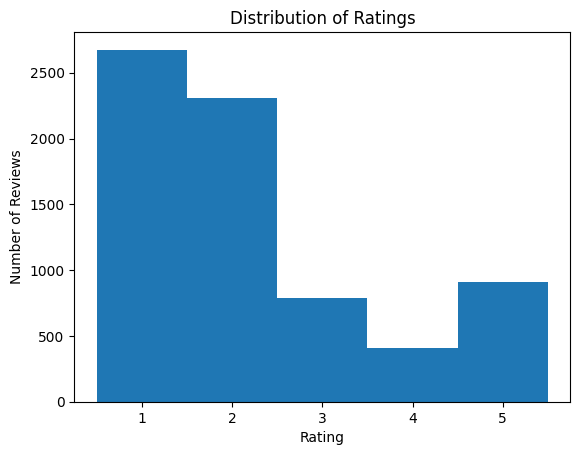

In [ ]:
# Viewing the distribution of outliers (how many 1 star, 2 star, 3 star, 4 star and 5 star reviews were classified as outliers?)

# Create a histogram of the 'rating' column
plt.hist(outliers['rating'], bins=[1, 2, 3, 4, 5, 6], align='left')

# Set the labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')

# Get the count of each rating value
counts_outliers = outliers['rating'].value_counts()

# Print the counts
print("Count of 1 rating reviews:", counts_outliers[1])
print("Count of 2 rating reviews:", counts_outliers[2])
print("Count of 3 rating reviews:", counts_outliers[3])
print("Count of 4 rating reviews:", counts_outliers[4])
print("Count of 5 rating reviews:", counts_outliers[5])

percentages_outliers = counts_outliers / n_outliers * 100

# Print the percentages
print("Percentage of 1 rating reviews: {:.2f}%".format(percentages_outliers[1]))
print("Percentage of 2 rating reviews: {:.2f}%".format(percentages_outliers[2]))
print("Percentage of 3 rating reviews: {:.2f}%".format(percentages_outliers[3]))
print("Percentage of 4 rating reviews: {:.2f}%".format(percentages_outliers[4]))
print("Percentage of 5 rating reviews: {:.2f}%".format(percentages_outliers[5]))

In [ ]:
# Number of reviews per year in the dataset
df_reviews_per_year = df.groupby('year')['rating'].count()  # Count the of reviews per year
df_reviews_per_year

year
2010      555
2011     2967
2012     6607
2013     8496
2014    10742
2015    16078
2016    15896
2017    12335
2018    10156
2019     5242
2020      997
2021      284
Name: rating, dtype: int64

Count of 2021 rating reviews: 284


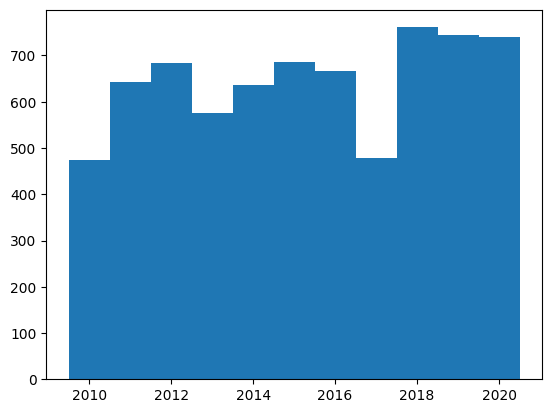

In [ ]:
# Number of reviews per year that were classified as outliers.

plt.hist(outliers['year'], bins=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], align='left')
# Get the count of each rating value
counts_outliers = outliers['year'].value_counts()
print("Count of 2021 rating reviews:", counts_outliers[2021])